In [1]:
from stereo_camera import *
import matplotlib.pyplot as plt

In [2]:
hflip = False

image_dir = './calibrate_images'

if (hflip):
    image_dir = image_dir + '_hflip'

image_search = image_dir +  '/*.png'
checker_def = (9,6,40) # 9x6 checkerboard; 40mm square size.
scale_ratio = 0.5

object_points, left_image_points, right_image_points, scaled_image_dims = get_corners (image_search, checker_def, scale_ratio, hflip)

calibration_data = calibrate_cameras(object_points, left_image_points, right_image_points, scaled_image_dims)

In [3]:
rms_left = calibration_data['rms_left']
left_camera_matrix = calibration_data['left_camera_matrix']
left_dist_coeffs = calibration_data['left_dist_coeffs']

print (rms_left)
print (left_camera_matrix)
print (left_dist_coeffs)

0.10847335054282697
[[322.06601382   0.         152.99533339]
 [  0.         323.55818412 123.86884382]
 [  0.           0.           1.        ]]
[[ 0.24943355 -0.66714239  0.00145115 -0.00304599  0.04830323]]


In [4]:
rms_right = calibration_data['rms_right']
right_camera_matrix = calibration_data['right_camera_matrix']
right_dist_coeffs = calibration_data['right_dist_coeffs']

print (rms_right)
print (right_camera_matrix)
print (right_dist_coeffs)

0.11417135959543895
[[316.27546477   0.         159.85894095]
 [  0.         317.77016242 120.30657101]
 [  0.           0.           1.        ]]
[[ 0.24469761 -0.43030815  0.00218239 -0.00074307 -0.73316373]]


In [5]:
rms_stereo = calibration_data['rms_stereo']
T = calibration_data['T']
Q = calibration_data['Q']

print(rms_stereo)
print(T)
print(Q)

0.11440294917853507
[[-6.50508582e+01]
 [ 1.78146196e-02]
 [-2.32645579e+00]]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 -1.47029350e+02]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -1.22827165e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.20664173e+02]
 [ 0.00000000e+00  0.00000000e+00  1.53627651e-02 -0.00000000e+00]]


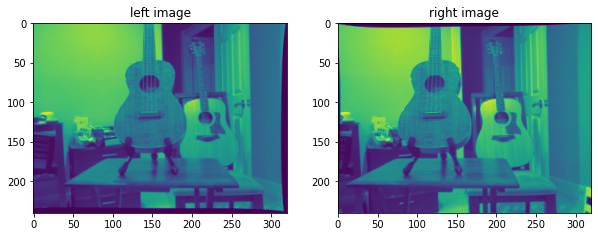

In [6]:
left_map_1 = calibration_data['left_map_1']
left_map_2 = calibration_data['left_map_2']
right_map_1 = calibration_data['right_map_1']
right_map_2 = calibration_data['right_map_2']

image_filename = image_dir + '/test.jpg'

image_pair = cv2.imread(image_filename, cv2.IMREAD_COLOR)
image_pair = cv2.cvtColor(image_pair, cv2.COLOR_BGR2GRAY)
image_left, image_right, _ = split_image(image_pair, hflip)

rectified_image_left = cv2.remap(image_left, left_map_1, left_map_2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
rectified_image_right = cv2.remap(image_right, right_map_1, right_map_2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

_, image_cells = plt.subplots(1, 2, figsize=(10, 10))
image_cells[0].imshow(rectified_image_left)
image_cells[0].set_title('left image')
image_cells[1].imshow(rectified_image_right)
image_cells[1].set_title('right image')
plt.show()

In [7]:
save_calibration_data(calibration_data, hflip, image_dir + '/calibration_data.npz')